Link to GitHub: https://github.com/BrandonShorter025/Project3_Brandon-Shorter

# ***Setting Up and Importing Libraries***

In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# ***Loading Datasets***

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

import pandas as pd

# Load the dataset (replace 'Life Expectancy Data.csv' with your file path if needed)
data = pd.read_csv('/content/drive/My Drive/Life Expectancy Data.csv')

# Preview the first few rows
print(data.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

# ***Data Cleaning***

In [ ]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Fill missing values for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Remove duplicate rows
data = data.drop_duplicates()

# Check for inconsistent categorical inputs
print("\nInspecting unique values in categorical columns:")
for col in data.select_dtypes(include='object').columns:
    print(f"{col} unique values:", data[col].unique())

# If any categorical inconsistencies are found, resolve them here
# Example: data['Status'] = data['Status'].replace({'Developed ': 'Developed'})

Missing values per column:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Inspecting unique values in categorical columns:
Country unique values: ['Afghanistan' 'Albania' 'Alg

# ***Feature Engineering***

In [ ]:
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Check feature correlation with target ('Life expectancy')
correlation = data.corr()['Life expectancy '].sort_values(ascending=False)
print(correlation)

# Remove features with low correlation or high multicollinearity
data = data.drop(['Unnecessary_Feature'], axis=1, errors='ignore')

Life expectancy                    1.000000
Schooling                          0.713054
Income composition of resources    0.688662
 BMI                               0.556901
Diphtheria                         0.472211
                                     ...   
 thinness 5-9 years               -0.462473
 thinness  1-19 years             -0.468002
Status_Developing                 -0.481415
 HIV/AIDS                         -0.556703
Adult Mortality                   -0.696390
Name: Life expectancy , Length: 213, dtype: float64


# ***Splitting Data***

In [ ]:
# Define target and features
X = data.drop('Life expectancy ', axis=1)
y = data['Life expectancy ']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ***Training the GBM Model***

In [ ]:
# Initialize GBM model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train model
gbm.fit(X_train, y_train)

# Predict
y_pred = gbm.predict(X_test)

# ***Evaluating the GBM Model***

In [ ]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 4.481454589003239
R² Score: 0.9482913254229677


# ***Visualizing Feature Importance***

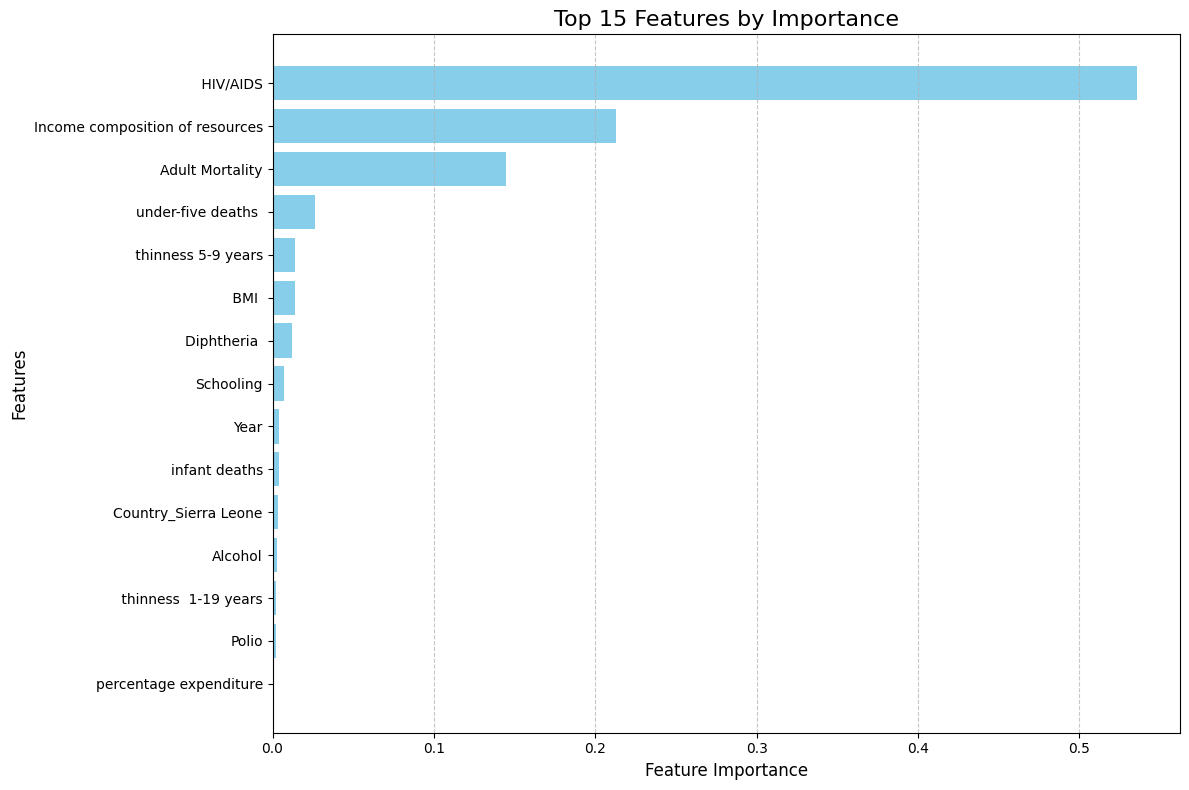

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of features to display
n = 15  # Adjust 'n' to the number of top features you want to visualize

# Sort indices for top 'n' features
sorted_idx = np.argsort(gbm.feature_importances_)[-n:]
top_features = np.array(X.columns)[sorted_idx]
top_importances = gbm.feature_importances_[sorted_idx]

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title(f"Top {n} Features by Importance", fontsize=16)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()